<a href="https://colab.research.google.com/github/AhmedKhan2210/Delhivery-Feature-Engineering/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

To enhance decision-making and improve operational efficiency, Delhivery needs a structured approach to clean, process, and transform raw data into meaningful features that can be used for analytics and forecasting. The challenge is to develop robust data processing pipelines that can:


Standardize and sanitize raw data to remove inconsistencies and improve data quality.


Extract relevant features that enhance the accuracy of forecasting models.


Streamline data transformation processes, enabling the data science team to build predictive models for demand forecasting, route optimization, and business efficiency.


By solving this problem, Delhivery can gain deeper insights into logistics performance, improve delivery accuracy, and maintain its competitive edge in the industry.

# Data Preparation and Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [ ]:
df = pd.read_csv("delhivery_data.csv")


In [ ]:
pd.set_option('display.max_columns', None) # To display all cloumns and none enusre no limits to display columns

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.isnull().sum()


,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
'''some column are unknown like- is_cutoff – Unknown field,
cutoff_factor – Unknown field,
cutoff_timestamp – Unknown field, factor – Unknown field,segment_factor – Unknown field'''

#Lets drop those columns
df.drop(columns=["is_cutoff",'cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace= True)

In [ ]:
df.shape

(144867, 19)

In [ ]:
# percentage of data Missing/unique values and value counts of unique values in each column
def column_details (df):
  count =0
  for column in df.columns:
    count= count+1
    print("Feature or column count is", count)
    print("\nColumn name is", column)
    count_null = df[column].isnull().sum()
    if count_null ==0:
      print ("\nNo Null values found")
    else:
      prcnt_of_null = round((count_null/len(df)) *100,2)
      print("\n", column, "column has",prcnt_of_null,"% of Null values")
    print("\nThere are",df[column].nunique(),"unique values in column",column)
    print("\n The Distribution of column",df[column].value_counts())
    print("*"*100)

In [ ]:
column_details(df)

Feature or column count is 1

Column name is data

No Null values found

There are 2 unique values in column data

 The Distribution of column data
training    104858
test         40009
Name: count, dtype: int64
****************************************************************************************************
Feature or column count is 2

Column name is trip_creation_time

No Null values found

There are 14817 unique values in column trip_creation_time

 The Distribution of column trip_creation_time
2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: count, Length: 14817, dtype: int64
******************************************************************************

Observations:

Column source_name ahs 0.2 % null values

destination_name column has 0.18 % of Null values and all other columns are good

In [ ]:
# We have around 0.4% missing values, very less data so decided to remove,
len(df[(df['destination_name'].isna()) & (df['source_name'].isna())])

3

only three rows where destination_name and source_name are NAN

In [ ]:
df.dropna(inplace= True)
df.reset_index(drop=True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858
144312,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725
144313,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053
144314,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885


In [ ]:
df.shape

(144316, 19)

In [ ]:
# checking outliers using box
num_columns = df.select_dtypes(include=['number']).columns

In [ ]:
num_columns


Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
def detect_outliers(df,num_columns,row, col):
  plt.figure(figsize=(15,8))
  position =1
  for column in num_columns:
    plt.subplot(row,col,position)
    sns.boxplot(data=df, x=column)
    plt.title(column)
    position = position+1

  plt.tight_layout() #to adjust overlap
  plt.show()



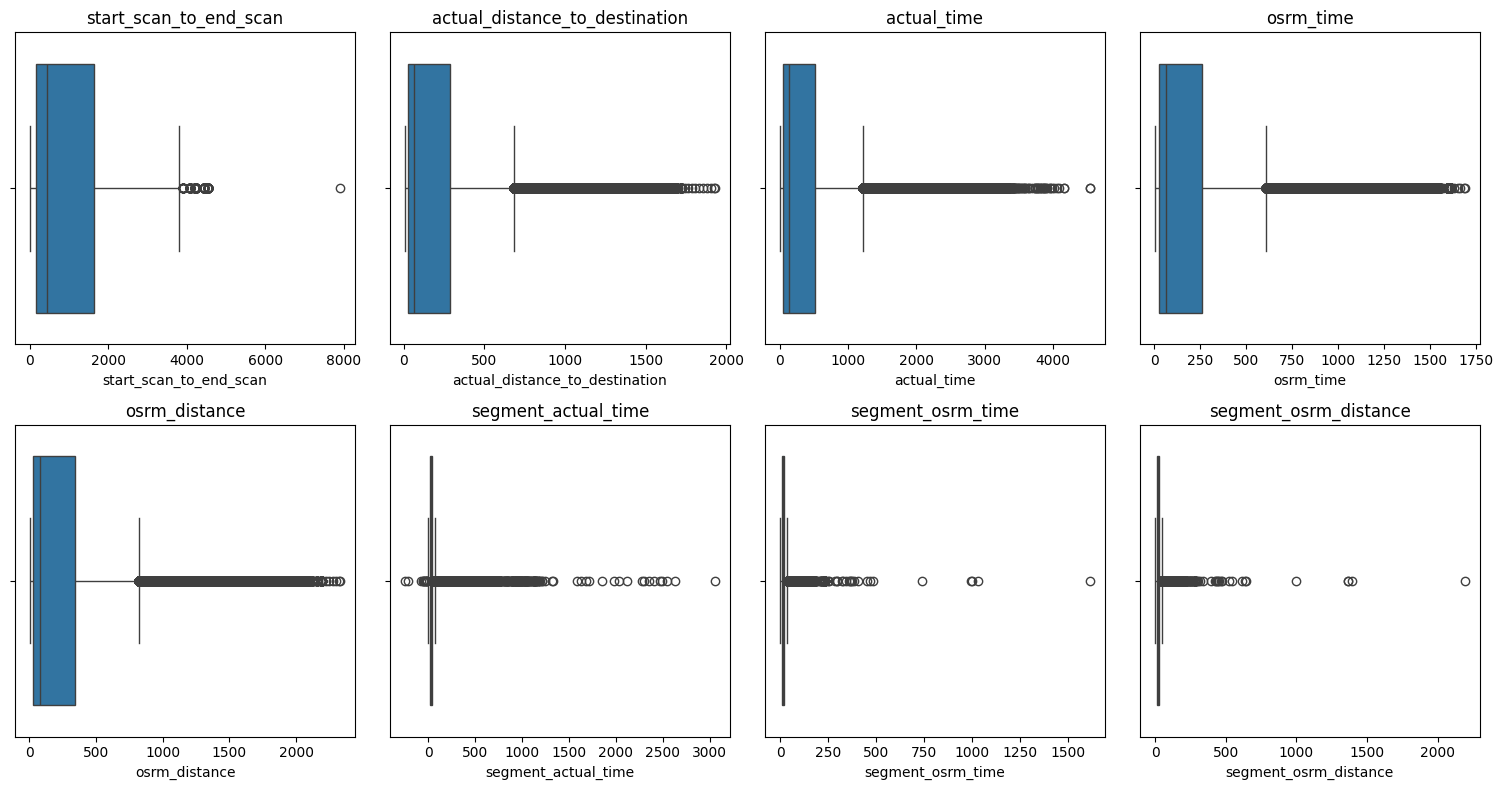

In [ ]:
detect_outliers(df,num_columns,2,4)

Observations: All the numerical columns have outliers

## Converting Time columns in Datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_to_de

In [ ]:
df['trip_creation_time'] =pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df["od_start_time"])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
data,144316,2,training,104632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144316,NaN,NaN,NaN,2018-09-22 13:05:09.454117120,2018-09-12 00:00:16.535741,2018-09-17 02:46:11.004421120,2018-09-22 03:36:19.186585088,2018-09-27 17:53:19.027942912,2018-10-03 23:59:42.701692,NaN
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144316,2,FTL,99132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144316,14787,trip-153837029526866991,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144316,1496,IND000000ACB,23267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144316,1466,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144316,NaN,NaN,NaN,2018-09-22 17:32:42.435769344,2018-09-12 00:00:16.535741,2018-09-17 07:37:35.014584832,2018-09-22 07:35:23.038482944,2018-09-27 22:01:30.861209088,2018-10-06 04:27:23.392375,NaN


**Observations:**

**FTL Dominance :** The most frequent route type is FTL (Full Truck Load) , appearing in 99,132 rows (68.7%) . This indicates that FTL is the primary mode of transportation in this dataset.

**source_center and destination_center**

High Cardinality : Both columns have 1,496 unique source centers and 1,466 unique destination centers , indicating a wide variety of origin and destination locations.
Most Frequent Centers : The most frequent source and destination center is "IND000000ACB" , appearing in 23,267 rows (16.1%) and 15,192 rows (10.5%) , respectively. This suggests certain hubs or centers handle a disproportionately large volume of shipments.

**Trip Creation Time (trip_creation_time) :**


The trips were created between 2018-09-12 and 2018-10-03 , spanning approximately 3 weeks .
The median creation time is around 2018-09-22 , indicating peak activity during this period.

**Start-to-End Scan Time (start_scan_to_end_scan) :**


The average time from the start scan to the end scan is 963.7 minutes (16 hours) , with a standard deviation of 1,038 minutes (17 hours) . This variability indicates significant differences in shipment durations.

**Actual Distance to Destination (actual_distance_to_destination) :**
The average distance is 234.7 km , with a minimum of 9 km and a maximum of 1,927.4 km .
The median distance is 66.1 km , indicating that most trips are relatively short.


**Actual Time (actual_time) :**
The average trip duration is 418 minutes (7 hours) , with a minimum of 9 minutes and a maximum of 4,532 minutes (75.5 hours) .
The median trip duration is 132 minutes (2.2 hours) , highlighting a skewed distribution with some very long trips.

#Analysis

In [ ]:
# grouping segmentwise
df['segmented_trip'] = df['trip_uuid']+df['source_name']+df['destination_name']
segment_col = ["segment_actual_time",'segment_osrm_time','segment_osrm_distance']


In [ ]:
for col in segment_col:
  df[col+'_sum']= df.groupby('segmented_trip')[col].cumsum()

In [ ]:
df[["segment_actual_time_sum",'segment_osrm_time_sum','segment_osrm_distance_sum']]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [ ]:
segment_dict ={
    "data":'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'
}

segment = df.groupby('segmented_trip').agg(segment_dict).reset_index() #group by mini trips

In [ ]:
segment= segment.sort_values(by =['segmented_trip','od_end_time'],ascending= True)

In [ ]:
segment

,segmented_trip,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748Bhopal_Trnsport_H (Madh...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
1,trip-153671041653548748Kanpur_Central_H_6 (Utt...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
2,trip-153671042288605164Doddablpur_ChikaDPP_D (...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164Tumkur_Veersagr_I (Karn...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517Bangalore_Nelmngla_H (K...,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069Thisayanvilai_UdnkdiRD_...,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,25.7087,30.0
26218,trip-153861115439069069Tirchchndr_Shnmgprm_D (...,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26219,trip-153861115439069069Tirunelveli_VdkkuSrt_I ...,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,105.0,37.387664,60.0,45.0,46.2538,59.0,61.0753,58.0
26220,trip-153861118270144424Hospet (Karnataka)Sandu...,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,28.0484,25.0


- Difference Between delivery time and scanning time

In [ ]:
segment["od_time_differ"]= segment['od_end_time']-segment['od_start_time']
segment["od_time_differ"] = segment["od_time_differ"].dt.total_seconds()/60

In [ ]:
segment["od_time_differ"]

,od_time_differ
0,999.505379
1,1260.604421
2,58.832388
3,122.779486
4,3099.723591
...,...
26217,45.478518
26218,62.115193
26219,105.656951
26220,66.933565


In [ ]:
trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_differ' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [ ]:
trip = segment.groupby('trip_uuid').agg(trip_dict)
trip = trip.reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_differ,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
trip[['actual_time','segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [ ]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


- Hypothesis Test (Paired T-Test because two sample from same trips)

In [ ]:
trip["actual_time"].mean()

356.30601203760057

In [ ]:
trip["segment_actual_time_sum"].mean()

353.0591735984311

In [ ]:
from scipy.stats import ttest_rel
# Actual time and segment actual time_sum
stats,pval = ttest_rel(trip['actual_time'],trip['segment_actual_time_sum'])
if pval<0.05:
  print("Reject Null hypothesis, There is difference between actual time & segment actual time")
  print('Might be due to trafiic or delay in loading and unloding or delays at checkpoint')
  print("costs will increase due to higher fuel consumption and driver overtime")
else:
  print("Accept null hypothesis and there is no difference between Actual time and segmnet actual time")

Reject Null hypothesis, There is difference between actual time & segment actual time
Might be due to trafiic or delay in loading and unloding or delays at checkpoint
costs will increase due to higher fuel consumption and driver overtime


There is difference between actual time & segment actual time
Might be due to trafiic or delay in loading and unloding or delays at checkpoint
costs will increase due to higher fuel consumption and driver overtime

In [ ]:
trip['actual_distance_to_destination'].mean()

164.0901961720598

In [ ]:
trip['osrm_distance'].mean()

203.88741124636508

In [ ]:
stats, pval = ttest_rel(trip['actual_distance_to_destination'],trip['osrm_distance'])
if pval<0.05:
  print("Reject Null Hypothesis and there is difference between actual distance to setination and osrm ditance")
  print('Drivers are taking shorter path,New roads, shortcuts, or closed roads may not be updated in OSRM data')
  print("Routing can be improved, Use historical trip data to update routing algorithms dynamically")
  print('Shorter distance will lead to lower fuel consumption and can increase revenue')
else:
  print("Accept null hypothesis and there is no difference between Actual time and segmnet actual time")

Reject Null Hypothesis and there is difference between actual distance to setination and osrm ditance
Drivers are taking shorter path,New roads, shortcuts, or closed roads may not be updated in OSRM data
Routing can be improved, Use historical trip data to update routing algorithms dynamically
Shorter distance will lead to lower fuel consumption and can increase revenue


There is difference between actual distance to setination and osrm ditance
Drivers are taking shorter path,New roads, shortcuts, or closed roads may not be updated in OSRM data
Routing can be improved, Use historical trip data to update routing algorithms dynamically
Shorter distance will lead to lower fuel consumption and can increase revenue

In [ ]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [ ]:
trip[['destination_name','source_name']]

,destination_name,source_name
0,gurgaon_bilaspur_hb (haryana),bhopal_trnsport_h (madhya pradesh)
1,doddablpur_chikadpp_d (karnataka),doddablpur_chikadpp_d (karnataka)
2,chandigarh_mehmdpur_h (punjab),bangalore_nelmngla_h (karnataka)
3,mumbai_mirard_ip (maharashtra),mumbai hub (maharashtra)
4,bellary_dc (karnataka),bellary_dc (karnataka)
...,...,...
14782,chandigarh_mehmdpur_h (punjab),chandigarh_mehmdpur_h (punjab)
14783,faridabad_blbgarh_dc (haryana),fbd_balabhgarh_dpc (haryana)
14784,kanpur_central_h_6 (uttar pradesh),kanpur_central_h_6 (uttar pradesh)
14785,eral_busstand_d (tamil nadu),eral_busstand_d (tamil nadu)


In [ ]:
trip["destination_name"].head(50)

,destination_name
0,gurgaon_bilaspur_hb (haryana)
1,doddablpur_chikadpp_d (karnataka)
2,chandigarh_mehmdpur_h (punjab)
3,mumbai_mirard_ip (maharashtra)
4,bellary_dc (karnataka)
5,chennai_poonamallee (tamil nadu)
6,chennai_vandalur_dc (tamil nadu)
7,bengaluru_nwylhnka_dc (karnataka)
8,surat_central_d_3 (gujarat)
9,delhi_bhogal (delhi)


In [ ]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,haryana,gurgaon,bilaspur,hb
1,karnataka,doddablpur,chikadpp,d
2,punjab,chandigarh,mehmdpur,h
3,maharashtra,mumbai,mirard,ip
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,central,6
14785,tamil nadu,eral,busstand,d


In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

- **Insights** - Busiest Route

In [ ]:
trip['route'] = trip['source_city'] + " → " + trip['destination_city']


In [ ]:
busiest_route = trip['route'].value_counts().idxmax()
busiest_route


'bengaluru → bengaluru'

In [ ]:
busiest_count = trip['route'].value_counts().max()

print(f"Busiest Route: {busiest_route} with {busiest_count} trips")

Busiest Route: bengaluru → bengaluru with 693 trips


- **Insights** - Popular Route

In [ ]:
popular_routes = trip['route'].value_counts().head(5)
print(popular_routes)


route
bengaluru → bengaluru    693
bangalore → bengaluru    477
bengaluru → bangalore    342
bhiwandi → mumbai        332
hyderabad → hyderabad    326
Name: count, dtype: int64


In [ ]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [ ]:
monthly_trips = trip.groupby("trip_month").size().reset_index(name="trip_count")
monthly_trips

,trip_month,trip_count
0,9,13011
1,10,1776


In [ ]:
trip['trip_month'].nunique()

2

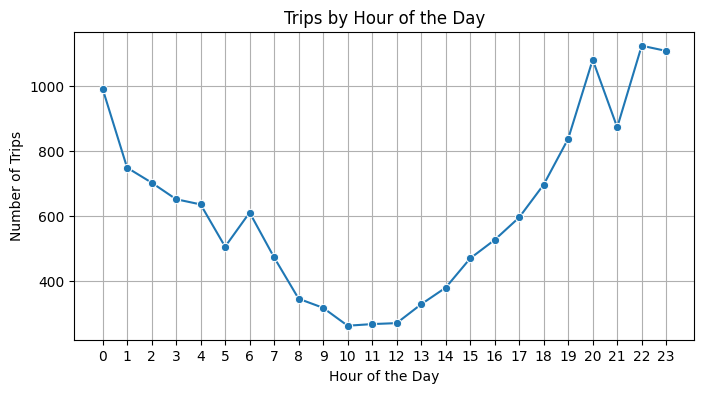

In [ ]:
hourly_trips = trip.groupby("trip_hour").size().reset_index(name="trip_count")

plt.figure(figsize=(8,4))
sns.lineplot(data=hourly_trips, x="trip_hour", y="trip_count", marker="o")
plt.title("Trips by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(True)
plt.show()


<ipython-input-56-1d11d48515d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_trips, x="trip_dayofweek", y="trip_count", palette="viridis")


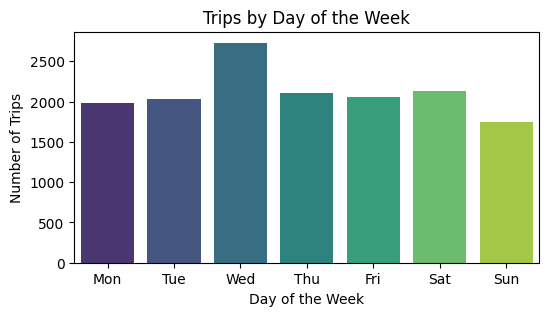

In [ ]:
weekly_trips = trip.groupby("trip_dayofweek").size().reset_index(name="trip_count")

plt.figure(figsize=(6,3))
sns.barplot(data=weekly_trips, x="trip_dayofweek", y="trip_count", palette="viridis")
plt.title("Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


<ipython-input-57-7641e68ecb7a>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="City")


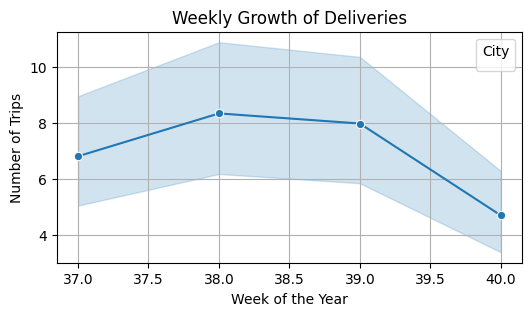

In [ ]:
weekly_trends = trip.groupby(['trip_week', 'destination_city']).size().reset_index(name='trip_count')

plt.figure(figsize=(6, 3))
sns.lineplot(data=weekly_trends, x='trip_week', y='trip_count', marker="o")
plt.title("Weekly Growth of Deliveries")
plt.xlabel("Week of the Year")
plt.ylabel("Number of Trips")
plt.legend(title="City")
plt.grid(True)
plt.show()


# Find outliers in numerical variable, and visualize it using visual analysis

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_differ']

<Axes: >

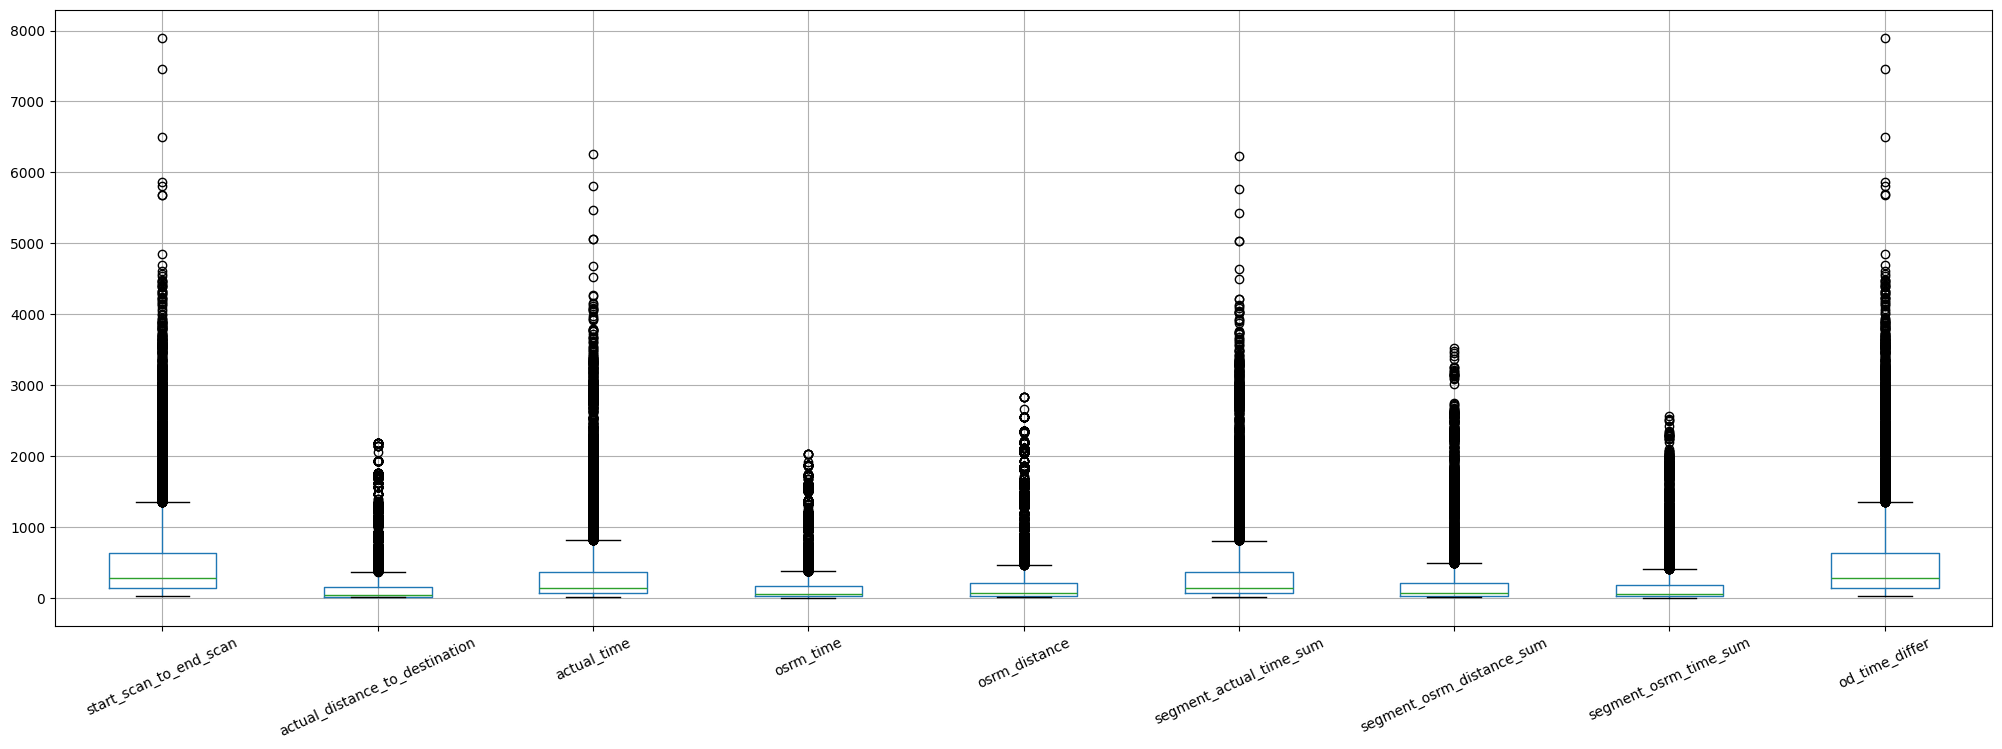

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

<Axes: >

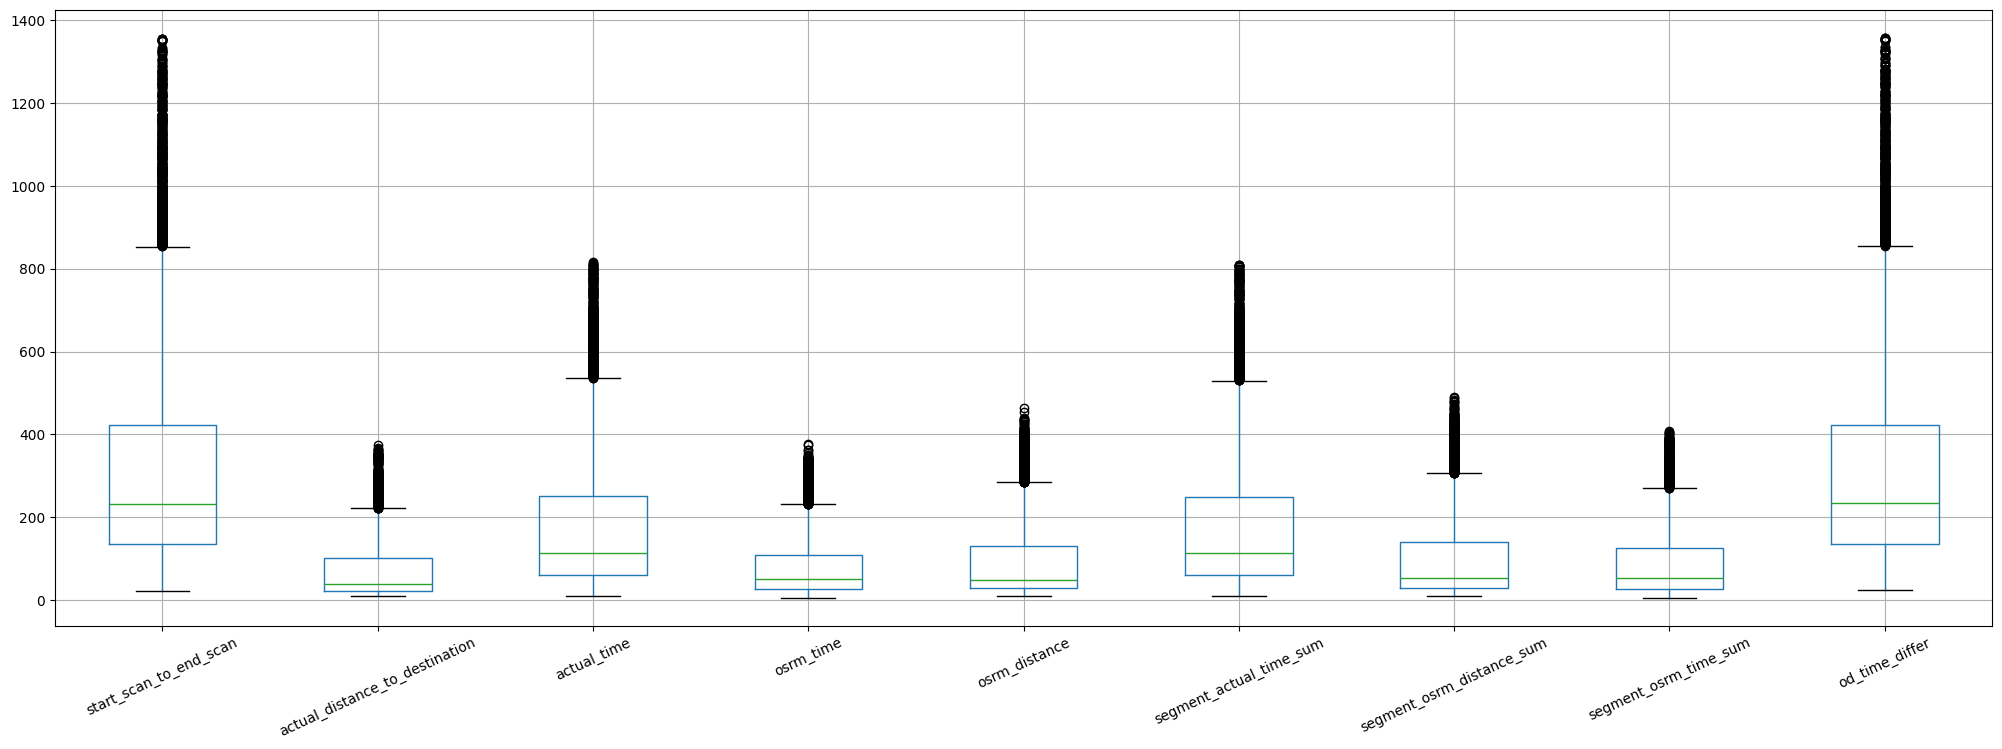

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

- **Observations**

A clear dip in trips between 1 AM and 5 AM, followed by a gradual increase in the morning.
The number of trips peaks around 10 AM and again between 8 PM - 11 PM,

suggesting:


- High delivery demand during business opening hours.
Increased evening demand, possibly due to e-commerce deliveries or food deliveries.

- Trips by Day of the Week-
Wednesdays and Saturday appear to have the highest trip counts.
Sundays have the lowest trip count, which could indicate lower customer demand or limited delivery operations on weekends.

- The trend suggests that businesses and consumers place more orders during the middle of the week rather than weekends.



- Increase workforce and vehicle availability during peak hours (10 AM & 8 PM - 11 PM).
Optimize weekend schedules, considering lower Sunday demand.

**Box Plot Observations**


Delays and inefficiencies exist—some trips take unexpectedly long times.
Need to analyze specific routes, traffic patterns, and operational bottlenecks.
OSRM Estimates Are Lower Than Actual Travel Times:


Estimated vs. actual travel times have large differences, especially for some trips.
Traffic, road conditions, and inefficiencies could be reasons

# Handling Categorical Variables

- Only two route_type – so one hot encoding is preferred

In [ ]:
trip['route_type'].value_counts()

,count
route_type,
Carting,8812
FTL,3911


In [ ]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(trip[num_cols])

StandardScaler()

In [ ]:
trip[num_cols]= scaler.transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_differ
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [ ]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_differ
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,7.818595e-18
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


**Recommendations**

Optimize Routing Engine for Better Accuracy


There is a significant discrepancy between OSRM estimates and actual trip parameters (time, distance).


Re-evaluate the data inputs provided to the routing engine to ensure accurate trip planning.


Cross-check with transporters to verify if the routing engine is configured for optimal results and whether real-world conditions are being factored in.



North, South, and West zones experience a high volume of orders, while Central, Eastern, and North-Eastern zones have limited activity.


While two months of data may not be conclusive, it is worth investigating opportunities for expansion in these regions to improve market reach.
Strategic Resource Planning for High-Demand States



Maharashtra and Karnataka have the highest order traffic, indicating the need for stronger operational support in these states.



Prioritize resource allocation (vehicles, manpower, warehousing) in these regions, especially during peak demand periods such as festive seasons.